In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import re
from PIL import Image


In [83]:
def load_data():
    train_dataset = []
    val_dataset = []
    test_dataset = []

    train_label = []
    val_label = []
    test_label = []

    
    path = "./f1driver/"
    dataset = os.listdir(path)
    
    for driver in dataset:
        driver_path = os.listdir(path+'/'+driver)
        count = len(driver_path)
        train_num = count * 0.7
        val_num = count * 0.26

        for each in driver_path:
            img_num = int(re.findall("\d+", each)[0])

            img_to_convert = Image.open(path+'/'+driver+'/'+each)
            img_array = np.array(img_to_convert)
            img_array = img_array[:,:,:3]
            img_array_resized = cv2.resize(img_array, (128, 128))
            
            if "leclerc" in each:
                if img_num < train_num:
                    train_dataset.append(img_array_resized)
                    train_label.append(0)
                elif train_num < img_num < train_num+val_num:
                    val_dataset.append(img_array_resized)
                    val_label.append(0)
                elif train_num + val_num < img_num:
                    test_dataset.append(img_array_resized)
                    test_label.append(0)

            elif "ver" in each:
                if img_num < train_num:
                    train_dataset.append(img_array_resized)
                    train_label.append(1)
                elif train_num < img_num < train_num+val_num:
                    val_dataset.append(img_array_resized)
                    val_label.append(1)
                elif train_num + val_num < img_num:
                    test_dataset.append(img_array_resized)
                    test_label.append(1)
    
    train_label = tf.keras.utils.to_categorical(train_label, 2)
    val_label = tf.keras.utils.to_categorical(val_label, 2)
    test_label = tf.keras.utils.to_categorical(test_label, 2)

    train_dataset = np.array(train_dataset)
    val_dataset = np.array(val_dataset)
    test_dataset = np.array(test_dataset)

    train_dataset = train_dataset.astype(np.float32)/255.0
    val_dataset = val_dataset.astype(np.float32)/255.0
    test_dataset = test_dataset.astype(np.float32)/255.0

    train_label = np.array(train_label)
    val_label = np.array(val_label)
    test_label = np.array(test_label)
                
    return (train_dataset, train_label), (val_dataset, val_label), (test_dataset, test_label)

In [84]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

In [85]:
class_names = ["leclerc", "verstappen"]
x_train = np.concatenate([x_train[0:6,], x_train[60:66,]], axis=0)
y_train = np.concatenate([y_train[0:6,], y_train[60:66,]], axis=0)

In [86]:
print(x_train.shape)

(12, 128, 128, 3)


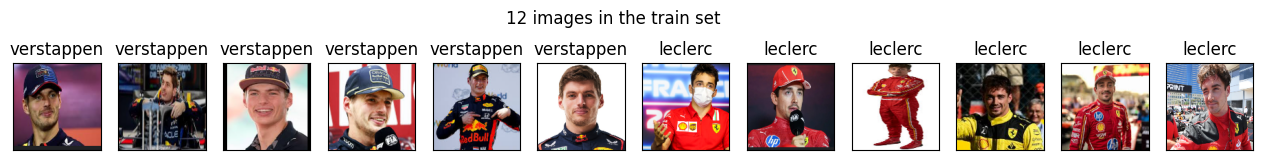

In [93]:
plt.figure(figsize=(16,2))
plt.suptitle("12 images in the train set")
for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i][1])])

In [97]:
batch_size = 6
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_size, shuffle=False)

substitute the generator object into "model.fit()" like "model.fit(generator.flow(x_train, y_train, batch_size=batch_size, shuffle=False..), epochs=epochs, validation_data=validation_data)"


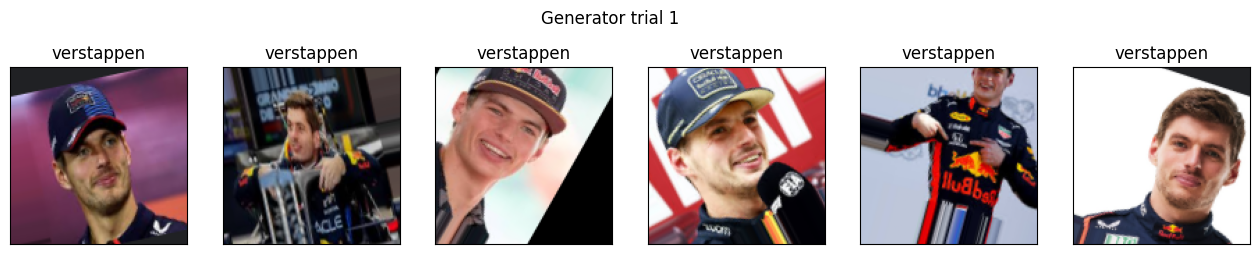

In [98]:
img, label = gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generator trial 1")
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i][1])])

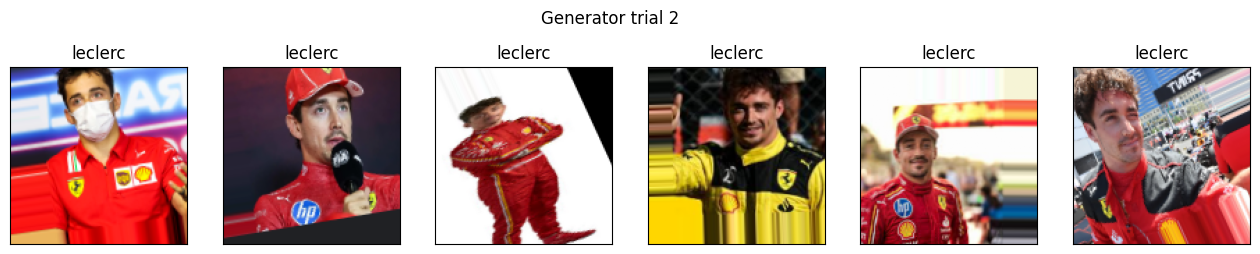

In [99]:
img, label = gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generator trial 2")
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i][0])])